# Project: Investigate a Dataset (about how people live their lives in different countries)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **OVERVIEW:**
> This dataset is about how people live their lives in different countries in many years.
>In this project I'll analyze the Women's lifestyle and how different cancers affect their mortality rates in 2002.

> **QUESTIONS:**
These are the questions will answered in the report.
>1. What are the most common cancers affecting women in 2002 compared with overall mortality?
>2. Which country has the highest and lowest number of deaths by breast cancer in 2002 ?
>3. How much government expenditure has been made over the period 1995-2010?
>4. What is the relationship between the rate of expenditure and the overall mortality rate?


>Matrices:
1. indicator breast female deaths
2. indicator cervix female deaths
3. indicator colon and rectum female deaths
4. indicator liver female deaths
5. indicator lung female deaths
6. indicator stomach female deaths
7. indicator_per capita government expenditure on health (ppp int. $)

In [584]:
#import libraries and packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import csv
% matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib.pyplot import figure
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling
> After selecting the dataset that wants to be analyzed and asked the questions, I'll keep only the relevant data and delete null data to make it easy and tidier. 

### General Properties

In [562]:
#reading data from csv files
df_colon=pd.read_csv("/Users/hanaalalawi/Desktop/DataAnalysis/indicators/colon.csv")
df_cervix=pd.read_csv("/Users/hanaalalawi/Desktop/DataAnalysis/indicators/cervix.csv")
df_liver=pd.read_csv("/Users/hanaalalawi/Desktop/DataAnalysis/indicators/liver.csv")
df_lung=pd.read_csv("/Users/hanaalalawi/Desktop/DataAnalysis/indicators/lung.csv")
df_stomach=pd.read_csv("/Users/hanaalalawi/Desktop/DataAnalysis/indicators/stomach.csv")
df_breast=pd.read_csv("/Users/hanaalalawi/Desktop/DataAnalysis/indicators/breast.csv")
df_goverment_health=pd.read_csv("/Users/hanaalalawi/Desktop/DataAnalysis/indicators/government_health.csv")

In [119]:
#get the colums and the first 5 rows to check the data, here there are 6 dataframe but they have the same structure
df_cervix.head()

,Cervix female deaths,2002,Unnamed: 2
0,Afghanistan,254.0,NaN
1,Albania,146.0,NaN
2,Algeria,1391.0,NaN
3,Angola,926.0,NaN
4,Argentina,1679.0,NaN


In [50]:
df_cervix.shape
#check the shape of dataframe, all dataframes have the same shape 

(174, 3)

In [488]:
df_goverment_health.head()

,Per capita government expenditure on health (PPP int. $),1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.242622,2.026442,2.509185,4.109661,4.272342,4.908018,4.503357,5.283590,5.182912
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,52.879198,57.820171,61.198199,72.681838,97.480268,96.169145,106.617371,109.305126,117.163233,150.919447,163.455314,177.651490,188.811412,220.964114,243.567487,225.381942
4,Algeria,144.894780,140.047446,145.827243,152.050691,147.600449,137.917782,164.337031,174.171852,184.789246,161.443126,159.639324,173.091882,211.124202,238.136941,289.061074,257.052609


In [483]:
df_goverment_health.shape

(262, 17)

***Observations in cancer dataset:***
>1. There are only 3 columns, one for year, another for the deaths and the last column is empty.
>2. There are 174 countries in this dataset.
>3. The datatype of female_deaths is correct.
>4. Need to change the column label to make it more meaningful.
>5. All data frames have the same shape.
>6. There are no duplicate rows in the datasets.
>7. Need to change the number of deaths from float to intger.
>8. Remove null values in the dataframe.



In [145]:
#discuss function to check the data in each dataframe and clean it...
def discuss_dataframe(dataframe):
    dataframe.info()
    print(dataframe.isnull().sum())
    if sum(dataframe.duplicated())==0:
        return True

In [485]:

#check missing, duplicate or Incorrect datatypes and fix it 
#colon cancer dataframe
discuss_dataframe(df_colon)
#cervix cancer dataframe
discuss_dataframe(df_cervix)
#breast cancer dataframe
discuss_dataframe(df_breast)
#liver cancer dataframe
discuss_dataframe(df_liver)
#lung cancer dataframe
discuss_dataframe(df_lung)
#stomach cancer dataframe
discuss_dataframe(df_stomach)
#goverment health 
discuss_dataframe(df_goverment_health)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
Colon&Rectum female deaths    173 non-null object
2002                          173 non-null float64
Unnamed: 2                    0 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.2+ KB
Colon&Rectum female deaths      1
2002                            1
Unnamed: 2                    174
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
Cervix female deaths    173 non-null object
2002                    173 non-null float64
Unnamed: 2              0 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.2+ KB
Cervix female deaths      1
2002                      1
Unnamed: 2              174
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
Breast female deaths    173 non-null object
2002                    173 non-null float64
U

True

In [496]:
discuss_dataframe(df_goverment_health)

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 0 to 261
Data columns (total 17 columns):
gov_health_per_person    262 non-null object
1995                     189 non-null float64
1996                     190 non-null float64
1997                     190 non-null float64
1998                     191 non-null float64
1999                     191 non-null float64
2000                     191 non-null float64
2001                     191 non-null float64
2002                     190 non-null float64
2003                     190 non-null float64
2004                     190 non-null float64
2005                     190 non-null float64
2006                     190 non-null float64
2007                     190 non-null float64
2008                     190 non-null float64
2009                     190 non-null float64
2010                     187 non-null float64
dtypes: float64(16), object(1)
memory usage: 36.8+ KB
gov_health_per_person     0
1995                     73
1996     

True


### Data Cleaning (Drop unused columns, change datatype and rename columns)

***Drop unused columns***

>We need to clean data to make it easy to analyze in this step Dropping unused column or empty column and null values or missing values in each dataframe.

In [438]:
# drop_cols function to drop unused column in the cancers dataframe 
def drop_cols(dataframe):
    if 'Unnamed: 2' in dataframe.columns:
        dataframe.drop(['Unnamed: 2'], axis=1, inplace=True)    

In [439]:
#calling drop function
#colon cancer dataframe and chech each dataset after dropping the column.
drop_cols(df_colon)
df_colon.head(1)

,country,colon_canser_deaths
0,Afghanistan,193


In [243]:
#cervix cancer dataframe
drop_cols(df_cervix)
df_cervix.head(1)

,Cervix female deaths,cervix_canser_deaths
0,Afghanistan,254


In [406]:
#breast cancer dataframe
drop_cols(df_breast)
df_breast.head(1)

,Breast female deaths,breast_canser_deaths
0,Afghanistan,874


In [245]:
#liver cancer dataframe
drop_cols(df_liver)
df_liver.head(1)

,Liver female deaths,liver_canser_deaths
0,Afghanistan,147


In [246]:
#lung cancer dataframe
drop_cols(df_lung)
df_lung.head(1)

,Lung female deaths,lung_canser_deaths
0,Afghanistan,173


In [247]:
#stomach cancer dataframe
drop_cols(df_stomach)
df_stomach.head(1)

,Stomach female deaths,stomach_canser_deaths
0,Afghanistan,499


>The goverment health dataframe has differnt shape. 
Removing null values and dummy values and check again.

In [498]:
#removing null values from goverment health dataframe
df_goverment_health.dropna(how='any',axis=0, inplace=True)
discuss_dataframe(df_goverment_health)

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 3 to 256
Data columns (total 17 columns):
gov_health_per_person    184 non-null object
1995                     184 non-null float64
1996                     184 non-null float64
1997                     184 non-null float64
1998                     184 non-null float64
1999                     184 non-null float64
2000                     184 non-null float64
2001                     184 non-null float64
2002                     184 non-null float64
2003                     184 non-null float64
2004                     184 non-null float64
2005                     184 non-null float64
2006                     184 non-null float64
2007                     184 non-null float64
2008                     184 non-null float64
2009                     184 non-null float64
2010                     184 non-null float64
dtypes: float64(16), object(1)
memory usage: 25.9+ KB
gov_health_per_person    0
1995                     0
1996       

True

In [499]:
#the dataframe shape after dropping.
df_goverment_health.shape

(184, 17)

In [500]:
df_goverment_health.head()

,gov_health_per_person,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
3,Albania,52.879198,57.820171,61.198199,72.681838,97.480268,96.169145,106.617371,109.305126,117.163233,150.919447,163.455314,177.651490,188.811412,220.964114,243.567487,225.381942
4,Algeria,144.894780,140.047446,145.827243,152.050691,147.600449,137.917782,164.337031,174.171852,184.789246,161.443126,159.639324,173.091882,211.124202,238.136941,289.061074,257.052609
6,Andorra,946.485930,1041.121110,1182.021924,1671.310190,1207.321175,1274.912000,1343.584926,1481.158594,1526.308695,1610.047556,1712.185758,2007.292277,2109.767878,2248.626016,2385.127806,2281.096968
7,Angola,59.537146,33.103587,37.484016,30.427416,32.882221,44.571775,70.317526,49.957804,58.435234,47.883027,53.135056,82.718173,104.976975,160.930350,267.239046,138.640325
9,Antigua and Barbuda,333.513009,322.409192,348.115067,369.601789,391.490098,403.456767,379.832018,388.005263,411.671096,436.695075,463.651584,535.699164,594.612080,602.089815,585.455154,702.973470


***Change datatype:***

>After dropped unused columns, Now Changing number female deaths datatype from float to integer.

In [249]:
#change_type, to change the datatype of number of deaths from float to int.
def change_type(dataframe,cancer_type):
    dataframe.dropna(subset=[cancer_type], inplace=True)
    dataframe[cancer_type] = dataframe[cancer_type].astype(int)

In [250]:
#calling change type function
#colon cancer dataframe
change_type(df_colon,'colon_canser_deaths')
#cervix cancer dataframe
change_type(df_cervix,'cervix_canser_deaths')
#breast cancer dataframe
change_type(df_breast,'breast_canser_deaths')
#liver cancer dataframe
change_type(df_liver,'liver_canser_deaths')
#lung cancer dataframe
change_type(df_lung,'lung_canser_deaths')
#stomach cancer dataframe
change_type(df_stomach,'stomach_canser_deaths')

***Rename columns***
> In this cleaning step  rename columns to meaningful names to make it easier when merging dataframes together.

In [248]:
#rename coulmns to more clear name
df_colon.rename(index=str, columns={"Colon&Rectum female deaths":"country","2002": "colon_canser_deaths"}, inplace=True)
df_breast.rename(index=str, columns={"2002": "breast_canser_deaths"}, inplace=True)
df_stomach.rename(index=str, columns={"2002": "stomach_canser_deaths"}, inplace=True)
df_lung.rename(index=str, columns={"2002": "lung_canser_deaths"}, inplace=True)
df_liver.rename(index=str, columns={"2002": "liver_canser_deaths"}, inplace=True)
df_cervix.rename(index=str, columns={"2002": "cervix_canser_deaths"}, inplace=True)

In [572]:
#change the first column in goverment health dataframe.
df_goverment_health.rename(index=str, columns={"Per capita government expenditure on health (PPP int. $)": "gov_health_per_person"}, inplace=True)
df_goverment_health.head(1)


,gov_health_per_person,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [505]:
#round the spending values.
df_goverment_health.round(2)

,gov_health_per_person,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
3,Albania,52.88,57.82,61.20,72.68,97.48,96.17,106.62,109.31,117.16,150.92,163.46,177.65,188.81,220.96,243.57,225.38
4,Algeria,144.89,140.05,145.83,152.05,147.60,137.92,164.34,174.17,184.79,161.44,159.64,173.09,211.12,238.14,289.06,257.05
6,Andorra,946.49,1041.12,1182.02,1671.31,1207.32,1274.91,1343.58,1481.16,1526.31,1610.05,1712.19,2007.29,2109.77,2248.63,2385.13,2281.10
7,Angola,59.54,33.10,37.48,30.43,32.88,44.57,70.32,49.96,58.44,47.88,53.14,82.72,104.98,160.93,267.24,138.64
9,Antigua and Barbuda,333.51,322.41,348.12,369.60,391.49,403.46,379.83,388.01,411.67,436.70,463.65,535.70,594.61,602.09,585.46,702.97
10,Argentina,387.30,383.15,410.11,433.51,468.05,452.27,449.76,352.49,378.57,421.53,496.48,566.89,667.81,761.76,920.69,702.56
11,Armenia,27.67,24.60,22.76,29.18,30.16,23.13,36.39,35.86,46.53,48.56,60.56,75.86,90.24,102.30,106.43,96.92
13,Australia,1050.15,1109.59,1206.75,1288.33,1426.12,1505.32,1573.24,1701.82,1757.27,1907.70,1978.66,2089.24,2237.12,2317.71,2368.73,2339.68
14,Austria,1654.83,1695.13,1851.23,1978.84,2097.67,2198.61,2210.83,2317.58,2415.67,2568.45,2646.36,2828.43,2964.38,3185.56,3330.22,3401.20
15,Azerbaijan,20.76,22.61,19.99,16.28,19.18,18.99,20.63,21.46,25.25,35.04,38.70,52.04,74.96,74.36,128.08,117.49


>Now all the dataframes are ready to merge it together to start exploring it and answering the questions.

***Create new dataframe:***

>Collecting all the dataframes into single dataframe to answering the questions. 

In [265]:
#concating the deaths columns to new dataframes
#copy of dataframes
cervix_data= df_cervix
colon_data=df_colon
breast_data=df_breast
liver_data=df_liver
lung_data=df_lung
stomech_data=df_stomach

df_colon_copy = colon_data.copy()
df_cervix_copy = cervix_data.copy()
df_liver_copy = liver_data.copy()
df_lung_copy = lung_data.copy()
df_stomach_copy = stomech_data.copy()
df_breast_copy = breast_data.copy()

#.str.contains('/')
df_cervix_copy.head(1)

,Cervix female deaths,cervix_canser_deaths
0,Afghanistan,254


In [270]:
#new_rows = df_cervix_copy.append(df_colon_copy,sort=True)
cancer_dataframe=pd.concat([df_colon_copy,df_cervix_copy['cervix_canser_deaths'],df_liver_copy['liver_canser_deaths'],df_lung_copy['lung_canser_deaths'],df_stomach_copy['stomach_canser_deaths'],df_breast_copy['breast_canser_deaths']], axis=1)
cancer_dataframe.head()

,country,colon_canser_deaths,cervix_canser_deaths,liver_canser_deaths,lung_canser_deaths,stomach_canser_deaths,breast_canser_deaths
0,Afghanistan,193,254,147,173,499,874
1,Albania,163,146,59,154,92,300
2,Algeria,552,1391,103,205,333,2019
3,Angola,106,926,134,58,323,654
4,Argentina,2686,1679,909,1804,1171,5362


In [320]:
cancer_dataframe.shape

(173, 7)

In [330]:
cancer_dataframe.tail(10)

,country,colon_canser_deaths,cervix_canser_deaths,liver_canser_deaths,lung_canser_deaths,stomach_canser_deaths,breast_canser_deaths
163,United Kingdom,8278,1529,970,13390,2719,13303
164,United States,29629,5214,4837,65792,5406,42913
165,Uruguay,438,162,27,158,168,637
166,Uzbekistan,202,379,203,396,679,789
167,Vanuatu,0,8,4,4,4,7
168,Venezuela,631,1705,401,964,870,1327
169,Vietnam,1664,3334,1720,2043,2661,2284
170,"Yemen, Rep.",170,206,99,149,127,787
171,Zambia,79,1340,263,23,180,289
172,Zimbabwe,208,1492,359,190,297,489


>The cancer_dataframe contains the data about all cancers types, number of deaths and countries in 2002.

<a id='eda'></a>
## Exploratory Data Analysis

### 1. What are the most common cancers affecting women in 2002 in 174 country compared with overall mortality?

Text(0.5,1,'Total deaths of cancer types in 2002')

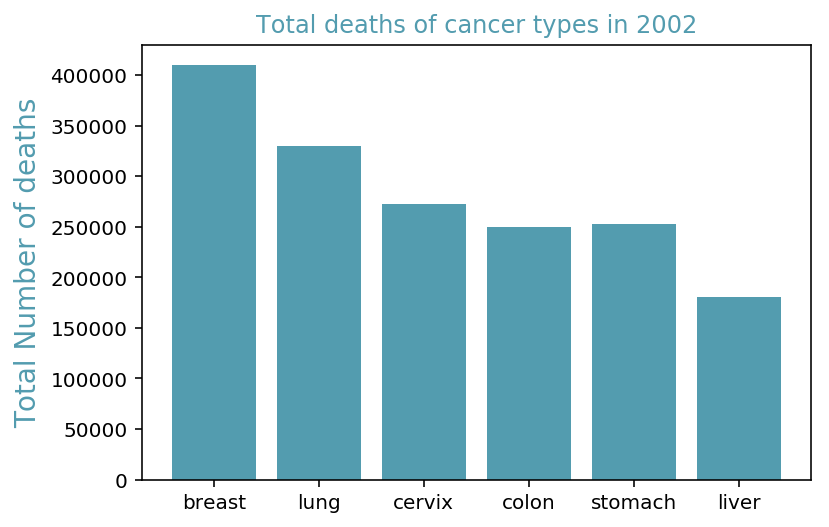

In [724]:
#What are the most common cancers affecting women in 2002 in 174 country compared with overall mortality?
cancer_array=({'breast':sum_breast,'lung':sum_lung,'cervix':sum_cervix,'colon':sum_colon,'stomach':sum_stomach,'liver':sum_liver})
plt.bar(range(len(cancer_array)), list(cancer_array.values()),color = '#539caf', align='center')
plt.xticks(range(len(cancer_array)), list(cancer_array.keys()))
plt.ylabel('Total Number of deaths', color = '#539caf', fontsize = '14')
plt.title('Total deaths of cancer types in 2002',color = '#539caf')
#print(cancer_array)

>Here in this figure, the most cancer type that affect woman is breast cancer, the total of woman deaths in 2002 is about breast cancer.  

### 2. Which country has the highest and lowest number of deaths by breast cancer in 2002?

In [448]:
print(cancer_dataframe['breast_canser_deaths'].max())
print(cancer_dataframe['breast_canser_deaths'].min())
cancer_dataframe.query('breast_canser_deaths>=44795')['country']
cancer_dataframe.query('breast_canser_deaths<=7')['country']
array=np.array([cancer_dataframe.query('breast_canser_deaths>=44795')['country'],cancer_dataframe.query('breast_canser_deaths<=7')['country']])
print(array)

44795
7
[['India']
 ['Vanuatu']]


>The dataset was collected from 174 countries around the world. In 2002 India has the highest number of women deaths by breast cancer.But Vanuatu has the lowest number of deaths.

### 3. How much government expenditure has been made over the period 1995-2010?

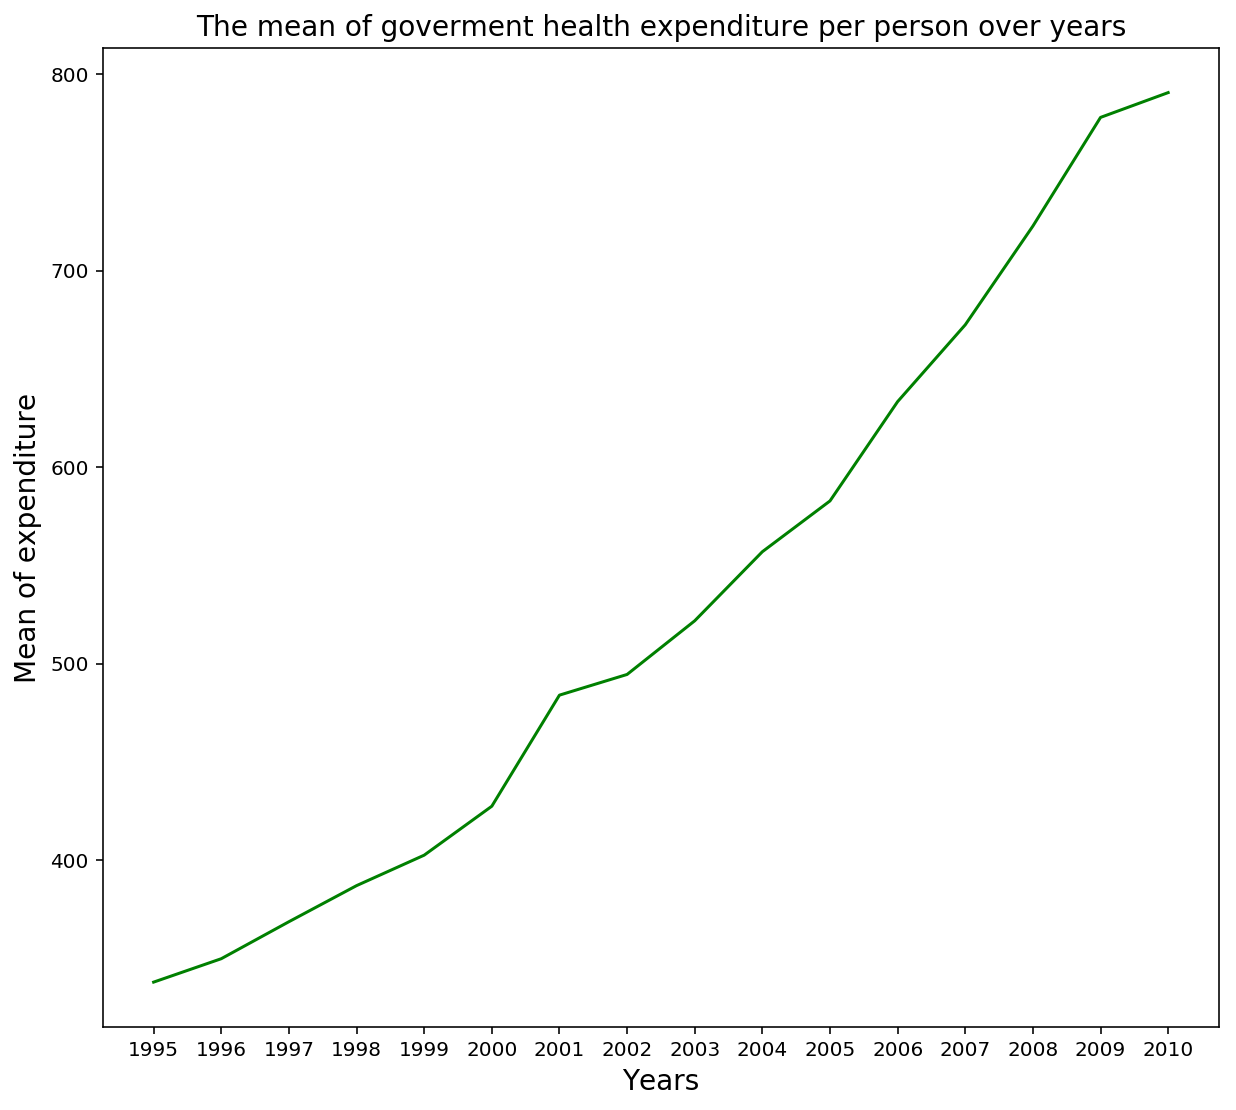

In [815]:
#plot the mean of The mean of goverment health expenditure per person over years
fig, ax = plt.subplots()
ax.plot(df_goverment_health.iloc[1:172, 1:].mean(),color='green')
ax.set_xlabel('Years',color = 'black', fontsize = '14')
ax.set_ylabel('Mean of expenditure',color = 'black', fontsize = '14')
ax.set_title('The mean of goverment health expenditure per person over years',color = 'black', fontsize = '14')
ax.figure.set_size_inches(10, 9)
plt.show()


>The goverments expenditure on health increased significantly from 1995 to 2010 to reduce the number of deaths in the world.


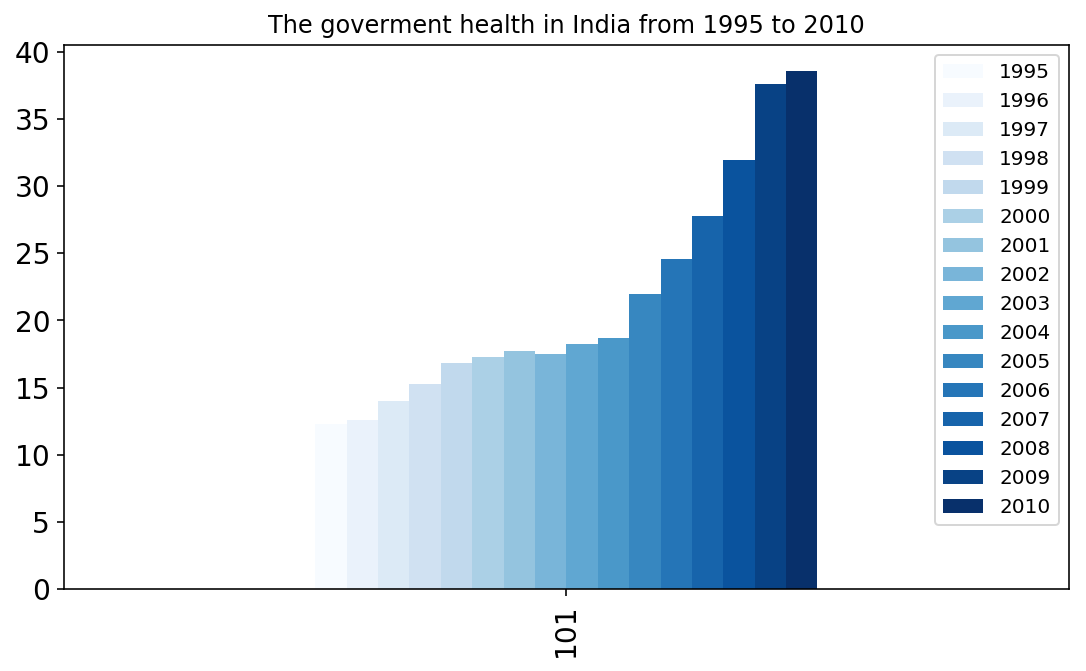

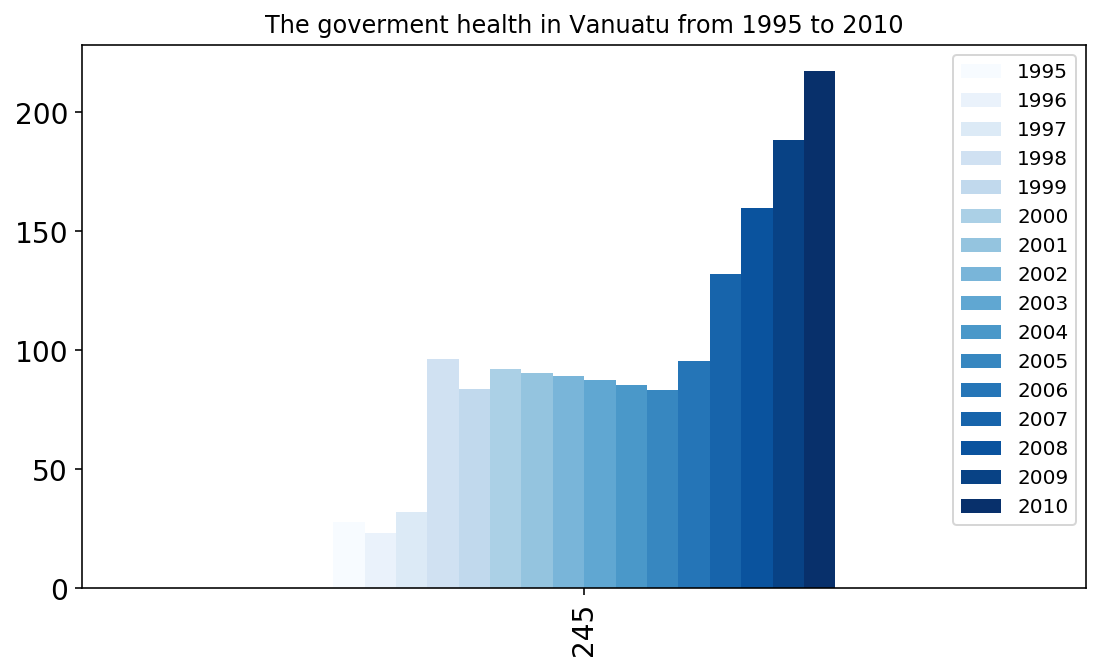

In [812]:
df_a=df_goverment_health[df_goverment_health['gov_health_per_person'] == 'India']
df_b=df_goverment_health[df_goverment_health['gov_health_per_person'] == 'Vanuatu']

df_a.plot( kind='bar',figsize=(9,5),title='The goverment health in India from 1995 to 2010',fontsize=14,legend=True,colormap='Blues',sort_columns=True)
df_b.plot(kind='bar',figsize=(9,5),title='The goverment health in Vanuatu from 1995 to 2010',fontsize=14,legend=True,colormap='Blues',
          sort_columns=True)
plt.show()
#number of expend across years on India and Vanuatu

>In question 2, The answer shown India has the highest number of deaths by breast cancer and the lowest is Vanuatu.
I discovered that what Vanuatu spent in 1995 was about the amount India spends per capita in 2010.
But the population and economy of each country must be considered.

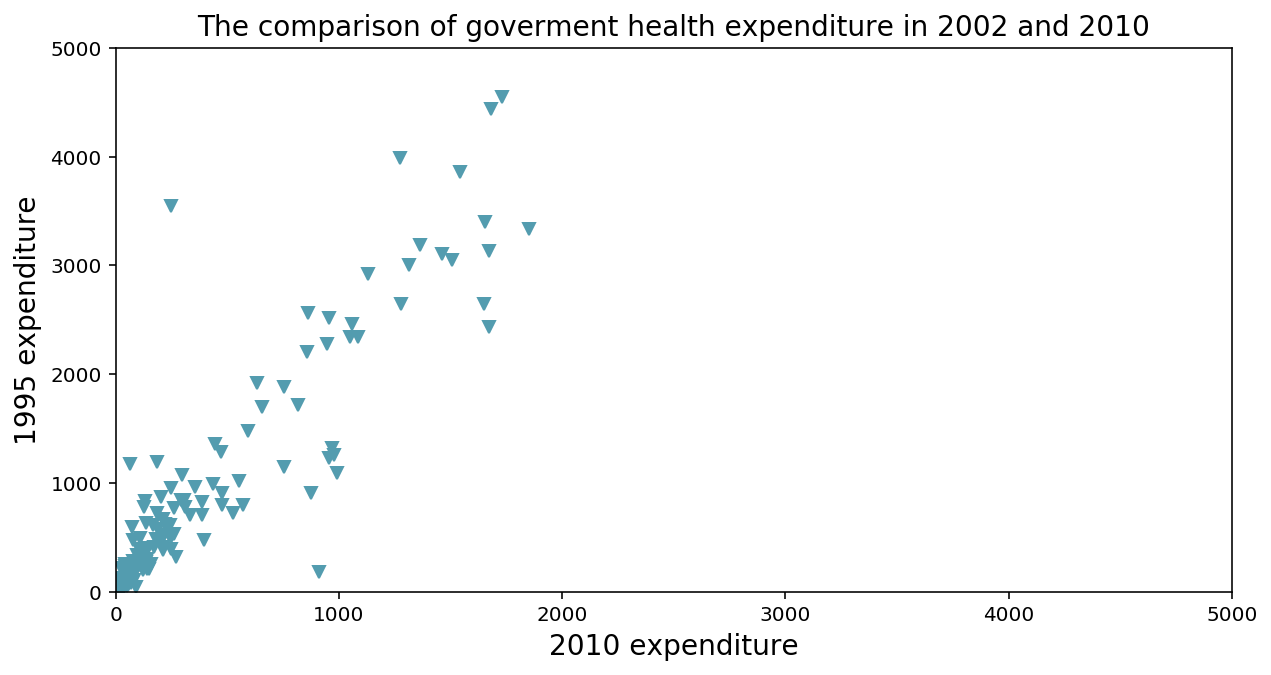

In [658]:
fig, ax = plt.subplots()
ax.plot(df_goverment_health['1995'],df_goverment_health['2010'], 'o', color='#539caf',marker="v")
ax.set_xlabel('2010 expenditure',color = 'black', fontsize = '14')
ax.set_ylabel('1995 expenditure',color = 'black', fontsize = '14')
ax.set_title('The comparison of goverment health expenditure in 2002 and 2010',color = 'black', fontsize = '14')
ax.figure.set_size_inches(10, 5)
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.show()


>I expected the difference between the results of 1995 and the results of 2010 to be much different, but it appears that most countries in this dataset spend less than  1,000 per person in a year. In 1995, there were not any a country spends more than  2,000 per capita. While a number of countries spend between  3,000 and  4,000 in 2010 also there were few countries spend  5,000. I think now in 2018 many countries spending more than 5000 in a year.

<a id='conclusions'></a>
## Conclusions


It was very interesting information about people's health across many years. 
After analyzing this dataset conclude that:
1. The highest woman deaths by cancer are about breast cancer.
2. The Lowest country of breast cancer deaths is Vanuatu and the highest in India.
3. The government health expenditure is increased over a years.
4. Discovered that what Vanuatu spent in 1995 was about the amount India spends per capita in 2010.

### Limitation
Some of the dataset hasn't the full overview about data.
The date of cancers data collection is rather old (All data were in 2002).

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])